# PPGEE0260: Modelagem e Simulação Discreta de Sistemas

Aluno: Carlos André de Mattos Teixeira

Código baseado em: https://github.com/williewheeler/stats-demos/blob/master/queueing/single-queue-sim.ipynb 


## Descrição
Objetivo: Adicionar dois novos eventos no simulador de fila M/M/1.

O código fornecido durante a aula contém um exemplo de simulação M/M/1, ou seja, um sistema de fila que contém um único servidor com chegadas e tempos de serviço determinados por uma distribuição exponencial, neste caso.  A simulação em questão representa um sistema de filas com um pré-determinado número de clientes a serem atendidos ao longo da execução da simulação. A chegada de clientes obedece uma distribuição exponencial, gerada por um processo de Poisson com taxa $\lambda$. Os tempos de serviço também são distribuídos exponencialmente, com uma taxa fixa $\mu$

A Figura 1 ilustra o diagrama de transição entre estados deste sistema M/M/1. Caso um pacote esteja sendo atendido durante a chegada de outros pacotes, a fila é incrementada e os pacotes em espera são atendidos em uma política FIFO. 

Cada execução é realizada com base em certos parâmetros pré-estabelecidos. Dentre eles estão o tempo médio de que os pacotes passam na fila, o atraso médio e a utilização do servidor $P = \lambda / (c*\mu)$, onde 𝝺 representa o tempo médio de serviço, $c$ o número de servidores do sistema (no caso, 1) e 𝝻 o tempo médio de chegada. Ao final de cada execução são calculadas e exibidas as métricas de desempenho.


![image](images/mm1-diagram.png)

A proposta deste trabalho é incrementar a simulação estudada em sala adicionando 2 novos tipos de eventos, listados a seguir. Considerando que o sistema representa um fila de atendimento atendida por apenas um servidor, o eventos que podem ocorrer durante o antendimento são os seguintes (os eventos 2 e 3 foram adicionados):

1. **Atendimento sem ocorrências**
- Neste caso o atendimento do cliente ocorre normalmente, de acordo com o tempo médio esperado.
    
2. **Atendimento com ocorrências**
- Este caso simula a ocorrência de um imprevisto, causando um atendimento mais demorado.
    
3. **Impossibilidade de Atendimento**
- Este caso simula a impossibilidade de atendimento de um cliente, que é dispensado após chegar no servidor.



## Set-up do Projeto

Três simulações diferentes serão executadas para demostrar o comportamento do sistema em diferentes cenários:

- **Experimento 1:** Sistema com Carga Baixa ($\lambda << \mu$)
- **Experimento 2:** Sistema com Carga Moderada ($\lambda \approx \mu$)
- **Experimento 3:** Sistema com Carga Alta ($\lambda >> \mu$)

In [1]:
# Recarregar módulos automaticamente
%load_ext autoreload
%autoreload 2
   
from src.source import *
from src.settings import *

## Experimento 1: Sistema com Carga Baixa ($\lambda < \mu$)

O Experimento 1 tem como objetivo simular um sistema de fila M/M/1 com baixa carga, ou seja, a taxa de chegada de clientes é consideravelmente menor do que a taxa média de atendimento. É de se esperar que o servidor ficara ocioso grande parte do tempo.

|Parâmetros                  |Variável              | Valor  |
|----------------------------|----------------------|--------|
|Número de Clientes          |`NUM_JOBS`            |   500  |
|Taxa Média de Chegada       |`MEAN_ARRIVAL_RATE`   |   8    |
|Taxa Média de Atendimento   |`MEAN_SERVICE_RATE`   |   32   |

Simulação
-------------------------
Número de Clientes:              = 500.0000
Taxa Média de Chegada (Lambda)   = 8.0000
Taxa Média de Serviço (Mu)       = 32.0000
Tempo Médio Entre Chegadas       = 0.1250
Tempo Médio de Serviço           = 0.0312



Estatísticas de Simulação
-------------------------
Duração Total                   = 64.2325



Taxas Médias:

Taxa de Chegada                 = 7.8651
Tempo entre Chegadas            = 0.1271
Tempo de Resposta               = 0.1344
Tempo de Espera                 = 0.0800
Taxa de Serviço                 = 18.3903
Tempo de Serviço                = 0.0544
Clientes no Sistema             = 1.0461
Clientes na Fila                = 0.6228
Throughput                      = 7.6923
Utilização                      = 0.4233



Lei de Little: E[N] = lambda * E[T]
-------------------------
Média de Clientes no Sistema   = 1.0461
T. de Chegada * T. de Resposta = 1.0569


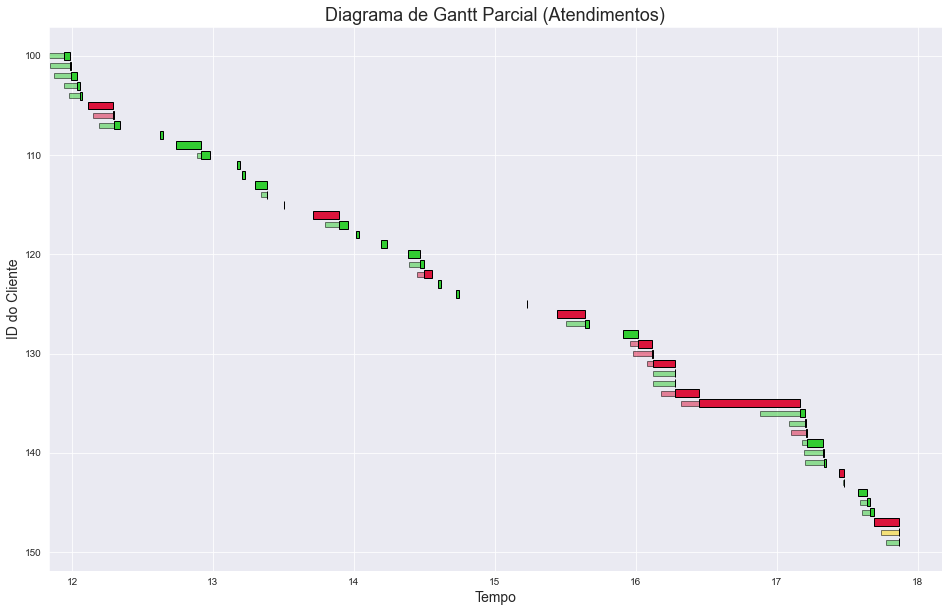

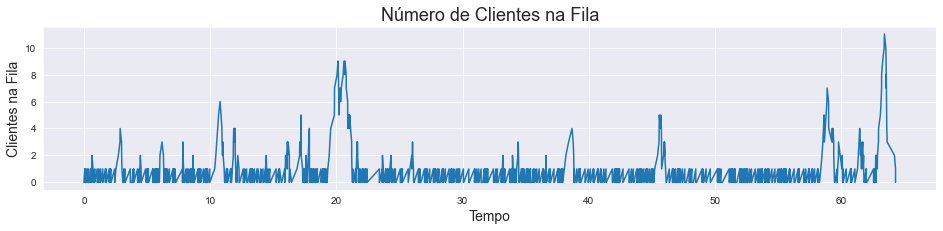

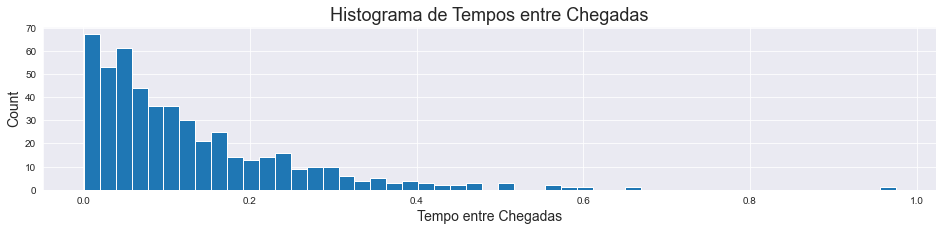

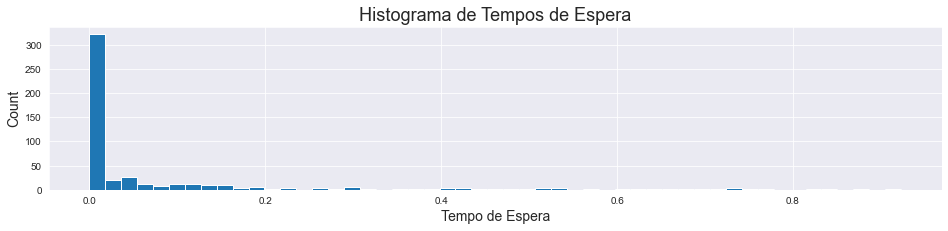

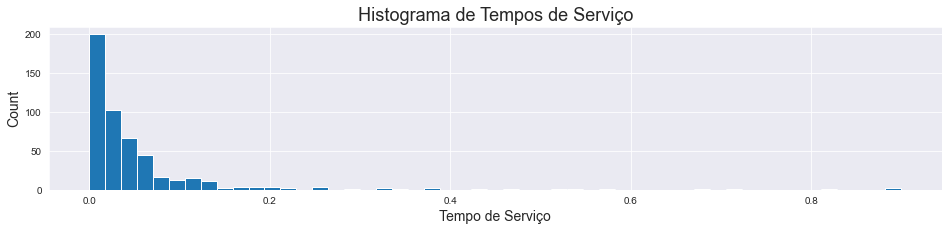

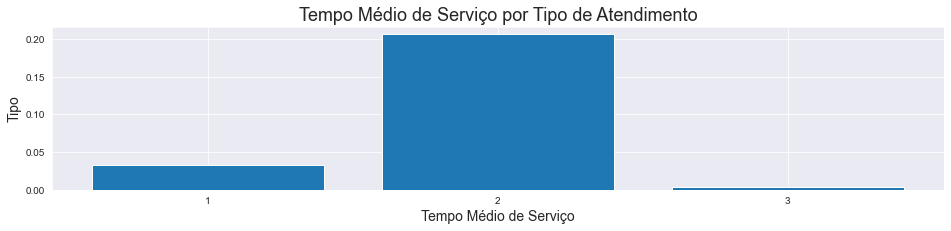

In [11]:
parameters = generate_parameters(500, 8, 32)
results_sim1 = run_sim_and_plot(parameters)

Sobre os Resultados

## Experimento 2: Sistema com Carga Moderada ($\lambda \approx \mu$)

O Experimento 2 tem como objetivo simular um sistema de fila M/M/1 com carga moderada, ou seja, a taxa de chegada de clientes é similar da taxa média de atendimento. Neste cenário, apesar de em teoria o servidor conseguir atender aos clientes sem grandes problemas, a introdução dos atrasos dos eventos do tipo 2 deve introduzir um alto nível de estresse no sistema.

|Parâmetros                  |Variável              | Valor  |
|----------------------------|----------------------|--------|
|Número de Clientes          |`NUM_JOBS`            |   500  |
|Taxa Média de Chegada       |`MEAN_ARRIVAL_RATE`   |   32   |
|Taxa Média de Atendimento   |`MEAN_SERVICE_RATE`   |   32   |

Simulação
-------------------------
Número de Clientes:              = 500.0000
Taxa Média de Chegada (Lambda)   = 28.0000
Taxa Média de Serviço (Mu)       = 32.0000
Tempo Médio Entre Chegadas       = 0.0357
Tempo Médio de Serviço           = 0.0312



Estatísticas de Simulação
-------------------------
Duração Total                   = 27.2633



Taxas Médias:

Taxa de Chegada                 = 27.9245
Tempo entre Chegadas            = 0.0358
Tempo de Resposta               = 4.7092
Tempo de Espera                 = 4.6547
Taxa de Serviço                 = 18.3397
Tempo de Serviço                = 0.0545
Clientes no Sistema             = 86.3660
Clientes na Fila                = 85.3660
Throughput                      = 17.8571
Utilização                      = 1.0000



Lei de Little: E[N] = lambda * E[T]
-------------------------
Média de Clientes no Sistema   = 86.3660
T. de Chegada * T. de Resposta = 131.5031


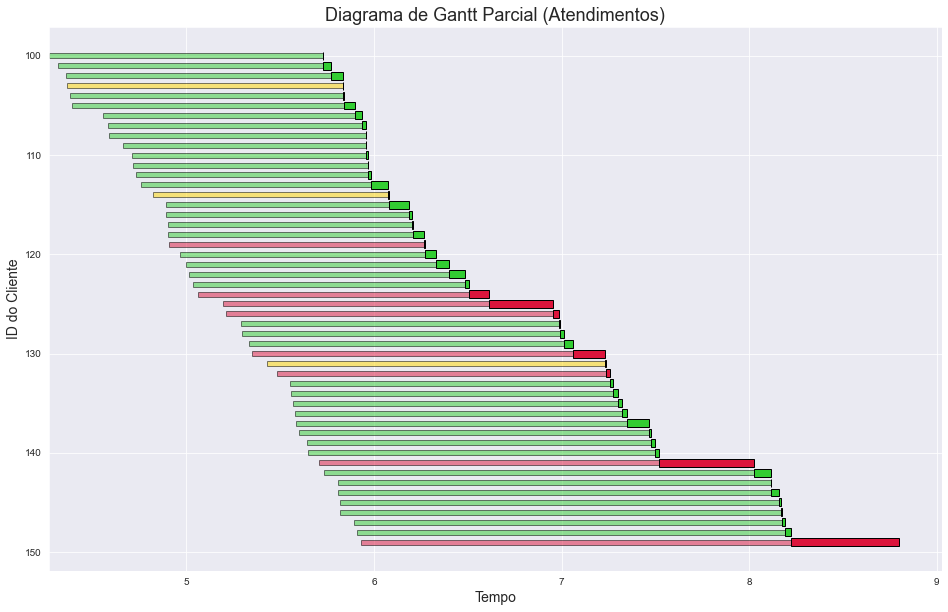

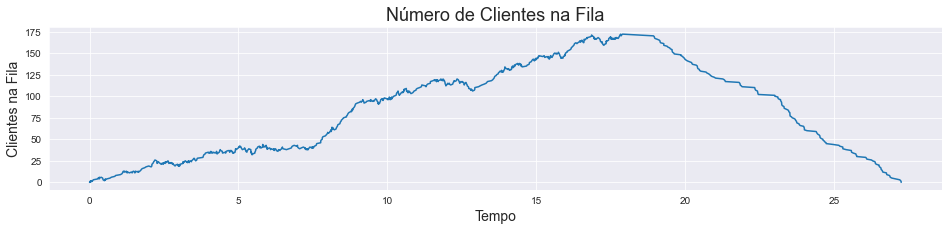

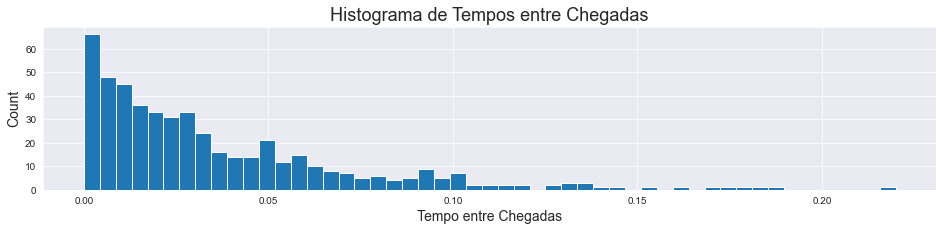

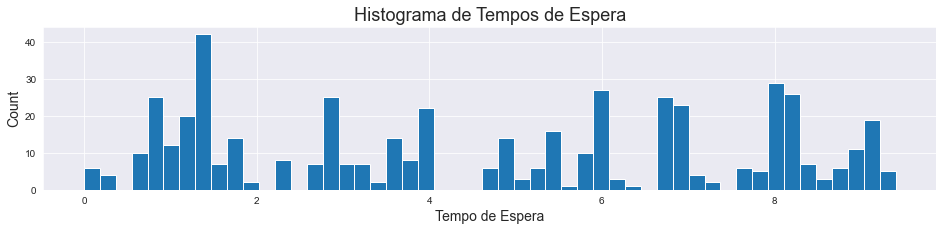

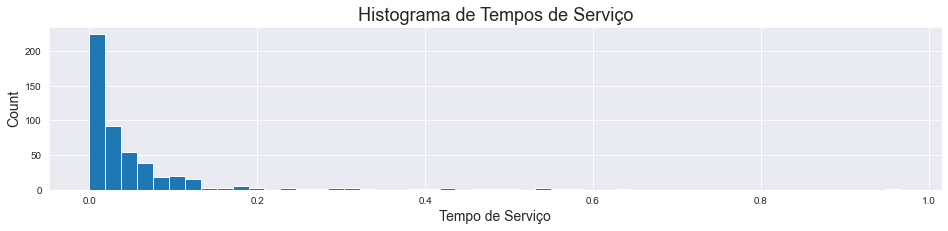

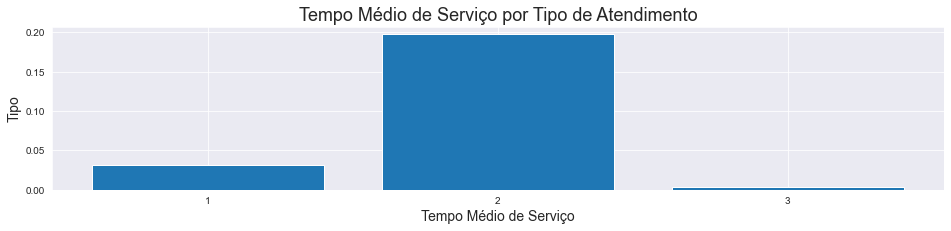

In [10]:
parameters = generate_parameters(500, 28, 32)

results_sim2 = run_sim_and_plot(parameters)

Sobre os Resultados

## Experimento 3: Sistema com Carga Alta ($\lambda >> \mu$)

O Experimento 3 tem como objetivo simular um sistema de fila M/M/1 com carga alta, ou seja, a taxa de chegada de clientes é consideravelmente maior do que a taxa média de atendimento. Neste cenário, é espero que haja um grande congestionamento no atendimento dos clientes. É provável que este congestionamento se agrave com as ocorrências de eventos do tipo 2.

|Parâmetros                  |Variável              | Valor   |
|----------------------------|----------------------|---------|
|Número de Clientes          |`NUM_JOBS`            |   500   |
|Taxa Média de Chegada       |`MEAN_ARRIVAL_RATE`   |   128   |
|Taxa Média de Atendimento   |`MEAN_SERVICE_RATE`   |   32    |

Simulação
-------------------------
Número de Clientes:              = 500.0000
Taxa Média de Chegada (Lambda)   = 128.0000
Taxa Média de Serviço (Mu)       = 32.0000
Tempo Médio Entre Chegadas       = 0.0078
Tempo Médio de Serviço           = 0.0312



Estatísticas de Simulação
-------------------------
Duração Total                   = 25.0915



Taxas Médias:

Taxa de Chegada                 = 127.0864
Tempo entre Chegadas            = 0.0079
Tempo de Resposta               = 10.3395
Tempo de Espera                 = 10.2893
Taxa de Serviço                 = 19.9271
Tempo de Serviço                = 0.0502
Clientes no Sistema             = 206.0354
Clientes na Fila                = 205.0354
Throughput                      = 19.2308
Utilização                      = 1.0000



Lei de Little: E[N] = lambda * E[T]
-------------------------
Média de Clientes no Sistema   = 206.0354
T. de Chegada * T. de Resposta = 1,314.0073


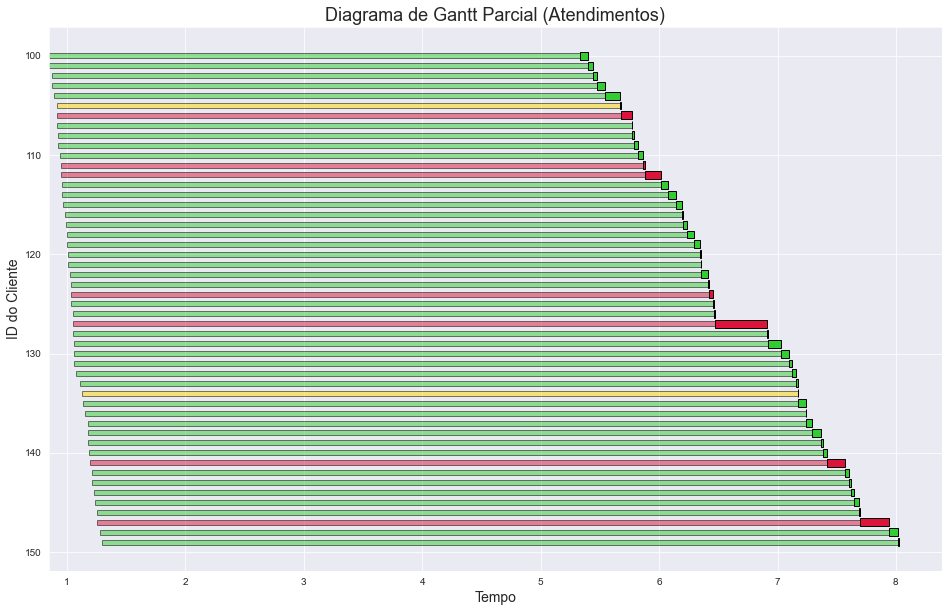

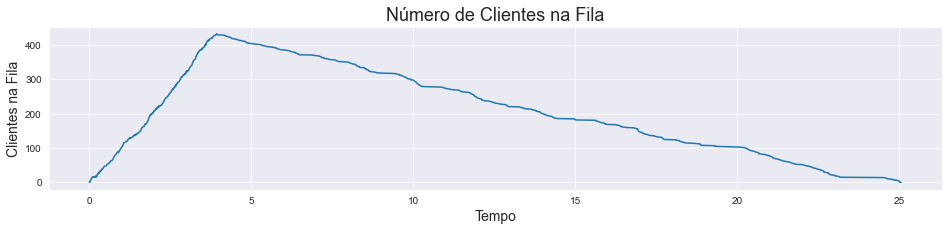

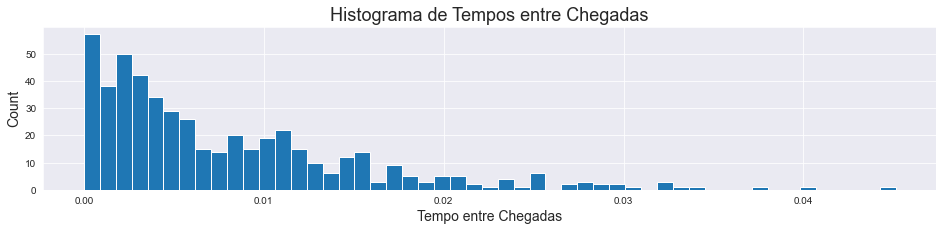

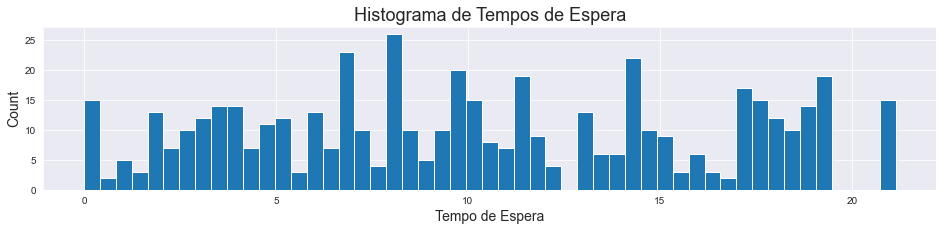

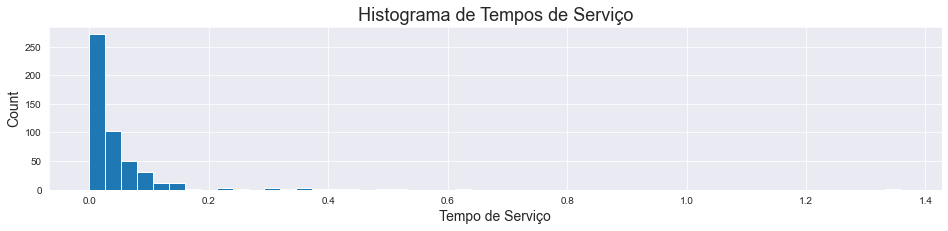

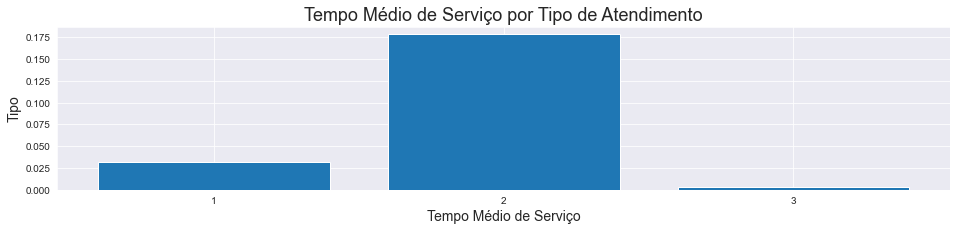

In [12]:
parameters = generate_parameters(500, 128, 32)

results = run_sim_and_plot(parameters)

Sobre o Experimento 3